У цьому домашньому завданні ми продовжуємо працювати з набором даних `Yulu`, з яким почали працювати в "hw 4.3. Робота з DataFrame. Діаграма розсіювання.". Фокус цього ДЗ в тому, аби будувати візуалізації використовуючи методи pandas.DataFrame. Це дозволяє будувати візуалізації ще швидше.

Документація до тої частини бібліотеки, з якою тут працюємо

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html

### Профіль колонок набору даних:

- **datetime**: дата та час зібрані погодинно
- **season**: сезон (1: весна, 2: літо, 3: осінь, 4: зима)
- **holiday**: чи є день святковим (витягнуто з http://dchr.dc.gov/page/holiday-schedule)
- **workingday**: якщо день не є вихідним або святковим, то позначається як 1, в іншому випадку – 0.
- **weather**:
  1. Ясно, Мало хмарно, частково хмарно
  2. Туман + Хмарно, Туман + Розірвані хмари, Туман + Мало хмарно, Туман
  3. Легкий сніг, Легкий дощ + Гроза + Розсіяні хмари, Легкий дощ + Розсіяні хмари
  4. Сильний дощ + Крижані кулі + Гроза + Туман, Сніг + Туман
- **temp**: температура в градусах Цельсія
- **atemp**: як відчувається температура в градусах Цельсія
- **humidity**: вологість
- **windspeed**: швидкість вітру
- **casual**: кількість неформальних користувачів
- **registered**: кількість зареєстрованих користувачів
- **count**: загальна кількість велосипедів, взятих в оренду, включаючи неформальних та зареєстрованих користувачів

0. Імпортуйте бібліотеки `matplotlib.pyplot` та `pandas`.  Завантажте дані з файла yulu_rental.csv у pandas.DataFrame df.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('../data/yulu_rental.csv')
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


1.1. Користуючись групою методів `pandas.plot` побудуйте гістограму кількості зареєстрованих користувачів з налаштуваннями за замовченням (тобто без жодних додаткових параметрів).

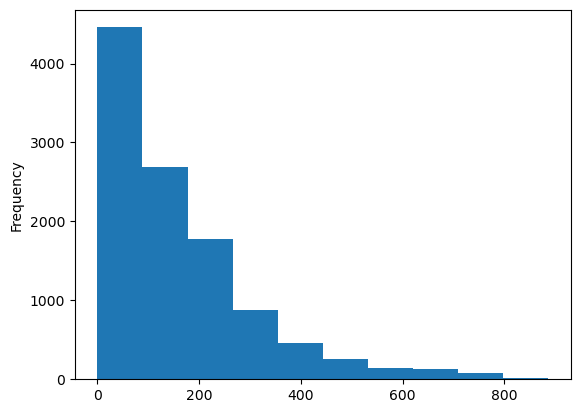

In [9]:
df['registered'].plot(kind='hist');

1.2. Побудуйте гістограму для цього ж показника, але задайте кількість бінів рівну 30 і задайте прозорість 0.5. Додайте підписи за осями ОХ і ОУ, а також назву дівграмі. Опишіть свої спостереження. Що бачите? Чому дані можуть мати такий розподіл?

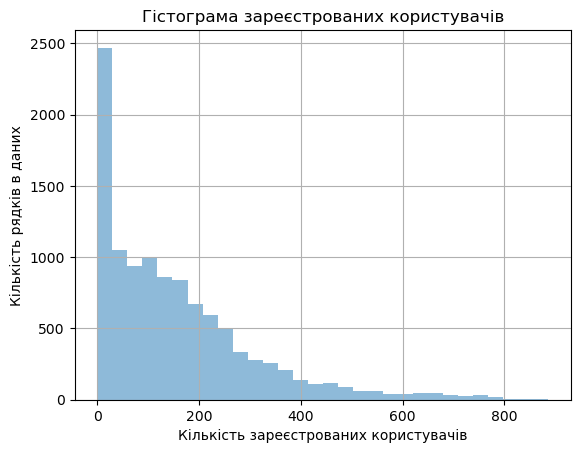

In [12]:
df['registered'].plot(
    kind='hist', 
    bins=30, 
    alpha = .5, 
    title='Гістограма зареєстрованих користувачів',
    xlabel = 'Кількість зареєстрованих користувачів',
    ylabel = 'Кількість рядків в даних',
    grid = True);

## Спостереження

1. Більшість рядків мають значення зареєстрованих користувачів близьке до 0. Це вказує на те, що велику частину часу (більша кількість рядків у вибірці) кількість активних зареєстрованих користувачів невелика. Це може бути пов'язано з тим, що наприклад, вночі кількість активних користувачів низька.
2. Бачимо поступове зниження кількості рядків зі збільшенням числа зареєстрованих користувачів. Це може вказувати на те, що періодів з годинами "пікової" навантаженості (наприклад, ранок чи вечір) набагато менше

Має вийти щось таке (може бути без сітки):

![](https://drive.google.com/uc?export=view&id=1Pb3UD8cmg_V0LLf8A4feOepTDXMqEAf8)


--------

Перетворимо колонку `datetime` на тип даних `pd.datetime` - це нам доопоможе в подальшій роботі. Просто запустіть колонку нижче і занатуйте собі цей метод роботи з колонкою, в якій міститься дата і час.

In [13]:
df['datetime'] = pd.to_datetime(df.datetime)

І створимо нову колонку `dayofweek` для того, аби дослідити детальніше, коли у нас немає поїздок.

In [14]:
df['dayofweek'] = df.datetime.dt.day_of_week

Переглянемо значення в колонкці. Колонка dayofweek містить числа від 0 до 6 включно, де 0 відповідає понеділку.

In [15]:
df[['datetime','dayofweek']][df.dayofweek==0].head()

,datetime,dayofweek
47,2011-01-03 00:00:00,0
48,2011-01-03 01:00:00,0
49,2011-01-03 04:00:00,0
50,2011-01-03 05:00:00,0
51,2011-01-03 06:00:00,0


2. Проведемо аналіз нульової активності зареєстрованих користувачів за днями тижня. Для цього
  1. Виберіть з набору даних усі записи, де кількість зареєстрованих користувачів дорівнює 0. Групуйте ці записи за днями тижня (`dayofweek`) та обчисліть кількість нульових записів для кожного дня.
  2. Після групування, використайте графік типу "bar" для візуалізації результатів. Кожна смужка на графіку має відображати кількість записів у даних для цього дня тижня, коли не було зареєстровано жодної поїздки користувачами.

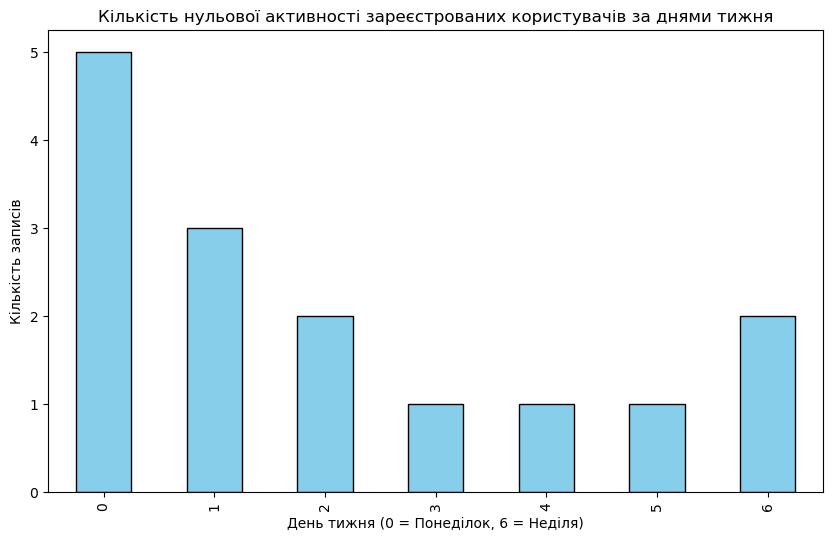

In [21]:
zero_registered_by_day = df[df['registered']==0].groupby('dayofweek').size()

plt.figure(figsize=(10, 6))
zero_registered_by_day.plot(
    kind='bar', 
    color='skyblue', 
    edgecolor='black',
    title = 'Кількість нульової активності зареєстрованих користувачів за днями тижня',
    xlabel = 'День тижня (0 = Понеділок, 6 = Неділя)',
    ylabel = 'Кількість записів');

Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1FXNzMa7rTdBQDwXSQfPTtPX5CHZK9A4X)

3. Проведемо аналіз загальної кількості зареєстрованих покристувачів за різними погодними умовами.
Згрупуйте всі дані за погодними умовами і визначте суму кількості зареєстрованих користувачів для кожної погодньої умови.
Побудуйте стовпачасту діаграму, які відобразить результат обчислень.
Зверніться до опису даних та дайте відповідь: чи побудована візуалізація має логічний сенс з точки зору опису даних.

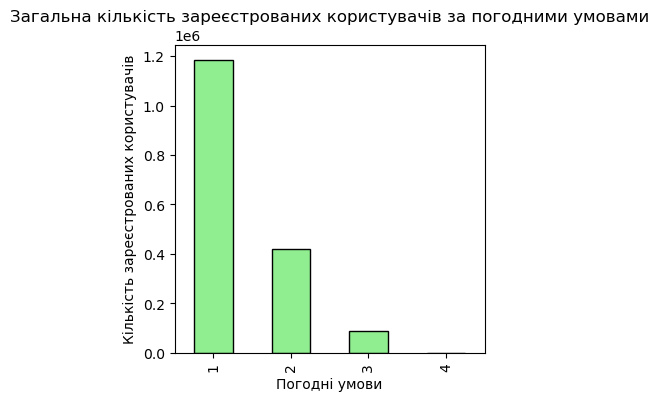

In [33]:
registered_by_weather = df.groupby('weather')['registered'].sum()
plt.figure(figsize=(4, 4))
registered_by_weather.plot(
    kind='bar', 
    color='lightgreen', 
    edgecolor='black',
    title = 'Загальна кількість зареєстрованих користувачів за погодними умовами',
    xlabel = 'Погодні умови',
    ylabel = 'Кількість зареєстрованих користувачів');

In [30]:
registered_by_weather

weather
1    1186163
2     419914
3      87106
4        158
Name: registered, dtype: int64

<Figure size 400x400 with 0 Axes>

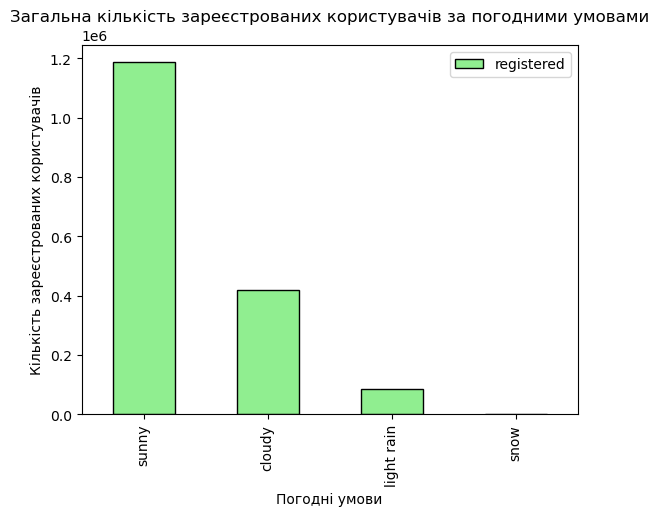

In [36]:
registered_by_weather = pd.DataFrame(df.groupby('weather')['registered'].sum())
registered_by_weather.index = ['sunny', 'cloudy', 'light rain', 'snow']
plt.figure(figsize=(4, 4))
registered_by_weather.plot(
    kind='bar', 
    color='lightgreen', 
    edgecolor='black',
    title = 'Загальна кількість зареєстрованих користувачів за погодними умовами',
    xlabel = 'Погодні умови',
    ylabel = 'Кількість зареєстрованих користувачів');

З бар чарту видно, що найбльша кількість зареєстрованих користувачів була активною саме в ясну, теплу погоду, тоді як кількість активних користувачів в грозу+сніг+дощ набагато менша. Що звучить доволі логічно.

4. Користуючись групою методів pandas.plot побудуйте діаграму розсіювання (scatter plot) між вологістю і кількістю зареєстрованих користувачів. Встановіть прозорість на 0.5, а також налаштуйте діаграму так, аби колір кожної точки відповідав значенню температури за відчуттями (`atemp`).

Проаналізуйте графік, що спостерігаєте?

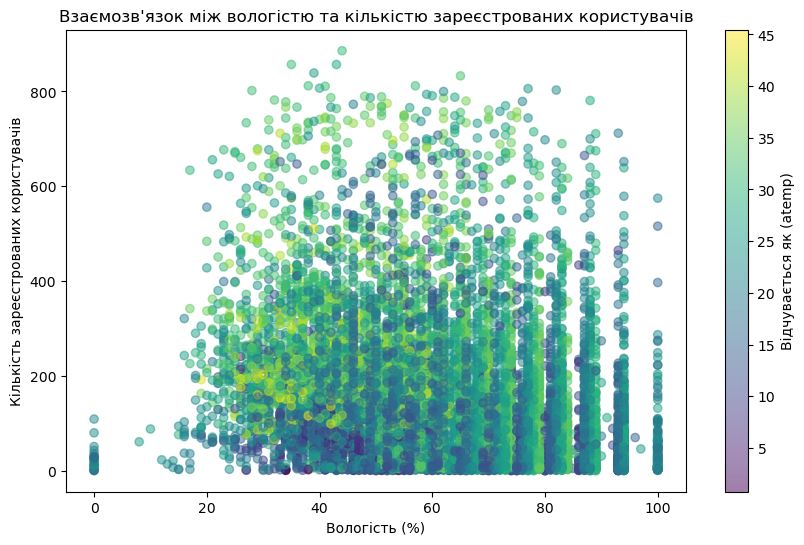

In [46]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    df['humidity'],  
    df['registered'],  
    c=df['atemp'],  
    alpha=0.5  
)
plt.title("Взаємозв'язок між вологістю та кількістю зареєстрованих користувачів")
plt.xlabel('Вологість (%)')
plt.ylabel('Кількість зареєстрованих користувачів')
plt.colorbar(scatter, label='Відчувається як (atemp)');

Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1trepX8z23YwyP9P8cAko9IzwOZkvLo8y)

## Спостереження:

1. Здається, немає явної лінійної залежності між вологістю та кількістю зареєстрованих користувачів, оскільки користувачі доволі розподілені по всій шкалі вологості
2. Більшість точок мають середні значення температури за відчуттями (atemp), які знаходяться в діапазоні 10-30°C. 
Яскравіші точки (з високою температурою за відчуттями) здебільшого розташовані при середніх значеннях вологості (30-70%).
3. Найвища щільність точок спостерігається при вологості в діапазоні 40-80%, що може бути оптимальним діапазоном для активності користувачів.
4. В зонах з вологістю близькою до 0% та високою вологістю (90-100%) спостерігається набагато менше користувачів.

Можливі висновки:
- Вологість не є критичним фактором для активності зареєстрованих користувачів. 
- Користувачі більше активні при комфортній температурі (10-30°C). Екстремально низькі або високі температури, ймовірно, знижують їх активність.